# Telecom Churn Prediction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
from sklearn import metrics

| Feature              | Description                                                                 |
|-----------------------|------------------------------------------------------------------------------|
| PAYMENT METHOD        | The mode used by the customer to pay their bills, such as credit card, debit card, or bank transfer. |
| TENURE                | The duration (in months or years) the customer has been subscribed to the service. |
| SUBSCRIBED SERVICES   | The list or number of additional services or plans the customer has subscribed to (e.g., voicemail, call waiting). |
| TOTAL MINUTES         | The total number of minutes the customer has used across all call types within the billing cycle. |
| STATE                 | The geographical state or region where the customer is located. |
| AREA CODE             | The telephone area code associated with the customer’s phone number, often indicating location. |
| INTERNATIONAL PLAN    | Indicates whether the customer has subscribed to an international calling plan (Yes/No). |
| DAY MINUTES           | The total call minutes used during daytime hours, usually billed at standard or higher rates. |
| NIGHT MINUTES         | The total call minutes used during nighttime hours, often billed at discounted rates. |


In [2]:
df_telecom=pd.read_csv("telecom_churn.csv")
df_telecom.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [60]:
df_telecom.shape

(5000, 21)

In [3]:
df_telecom.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [4]:
df_telecom.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

In [5]:
df_telecom.head(2)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [6]:
df_telecom['total_day_minutes'].describe()

count    5000.000000
mean      180.288900
std        53.894699
min         0.000000
25%       143.700000
50%       180.100000
75%       216.200000
max       351.500000
Name: total_day_minutes, dtype: float64

In [61]:
df_telecom['total_day_minutes']

0       265.1
1       161.6
2       243.4
3       299.4
4       166.7
        ...  
4995    235.7
4996    184.2
4997    140.6
4998    188.8
4999    129.4
Name: total_day_minutes, Length: 5000, dtype: float64

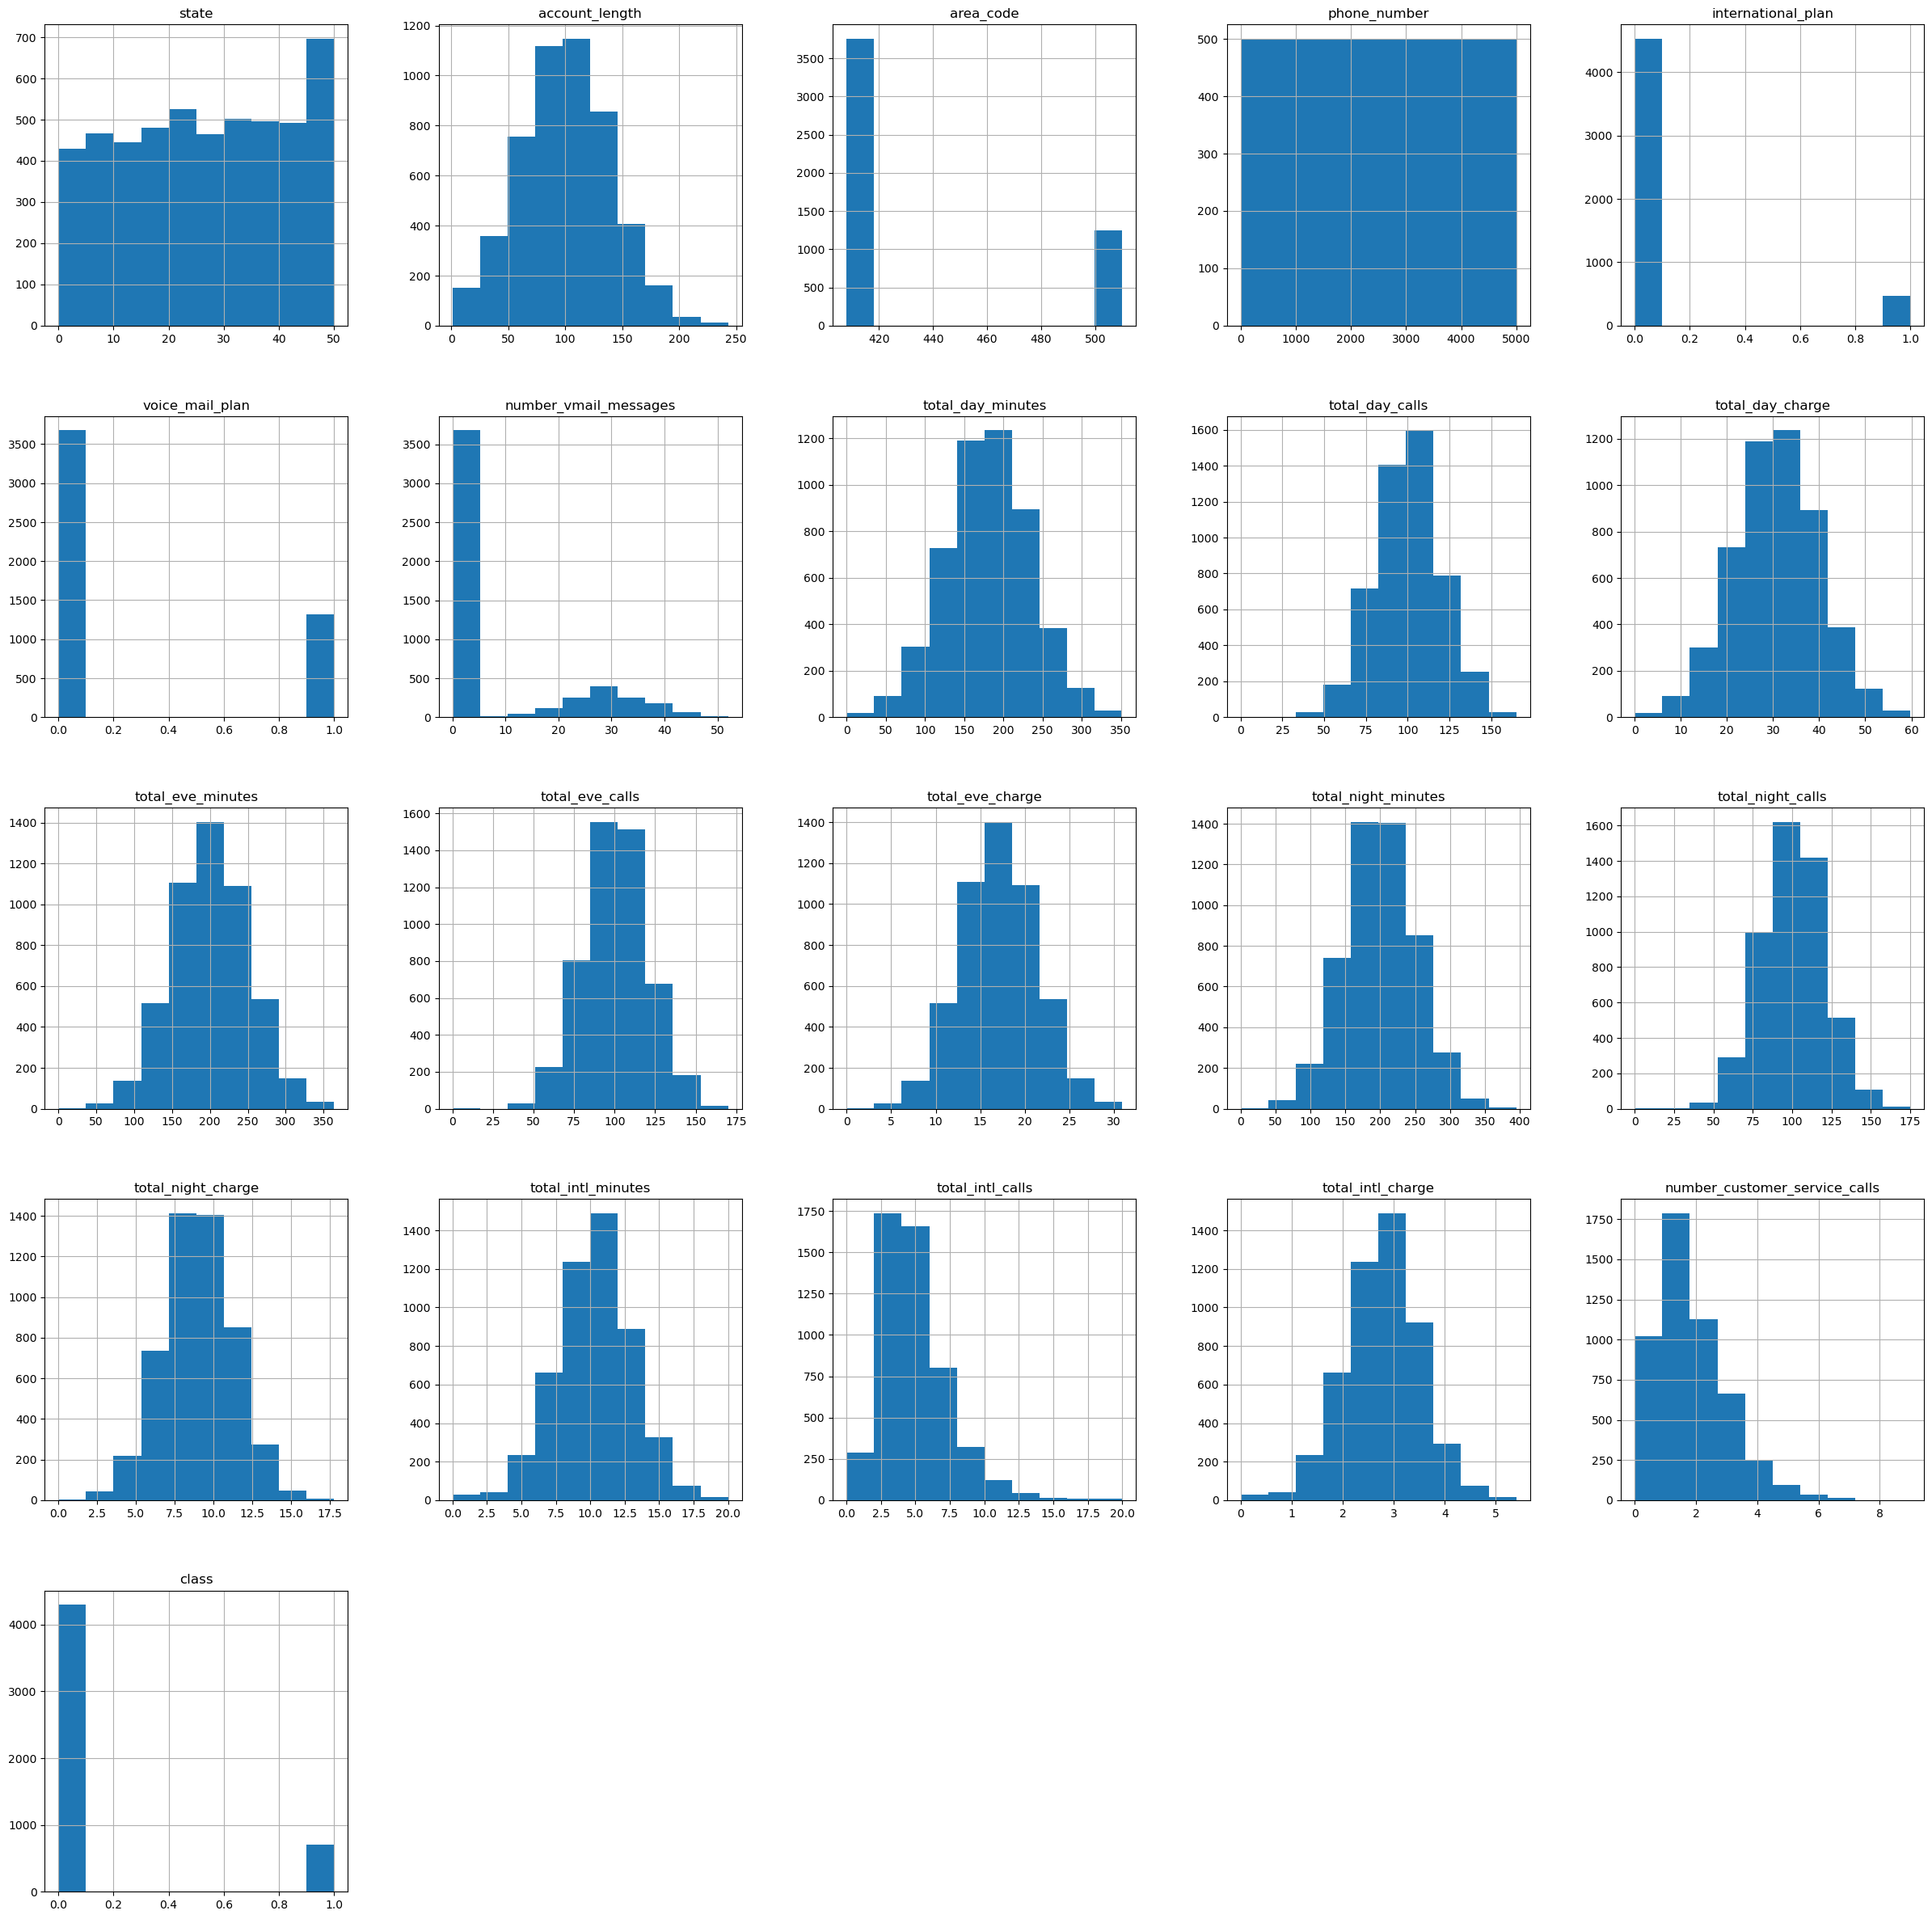

In [7]:
df_telecom.hist(figsize=(30,30))
plt.show()

## 86% customers stayed and 14% customers opted out of the telecom company

In [8]:
df_telecom['class'].value_counts()

class
0    4293
1     707
Name: count, dtype: int64

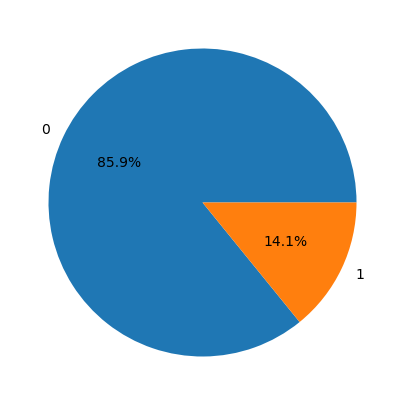

In [64]:
df_telecom['class'].value_counts().plot(kind="pie", figsize=(5, 5), autopct='%1.1f%%')
plt.ylabel('')  # To remove the default ylabel
plt.show()


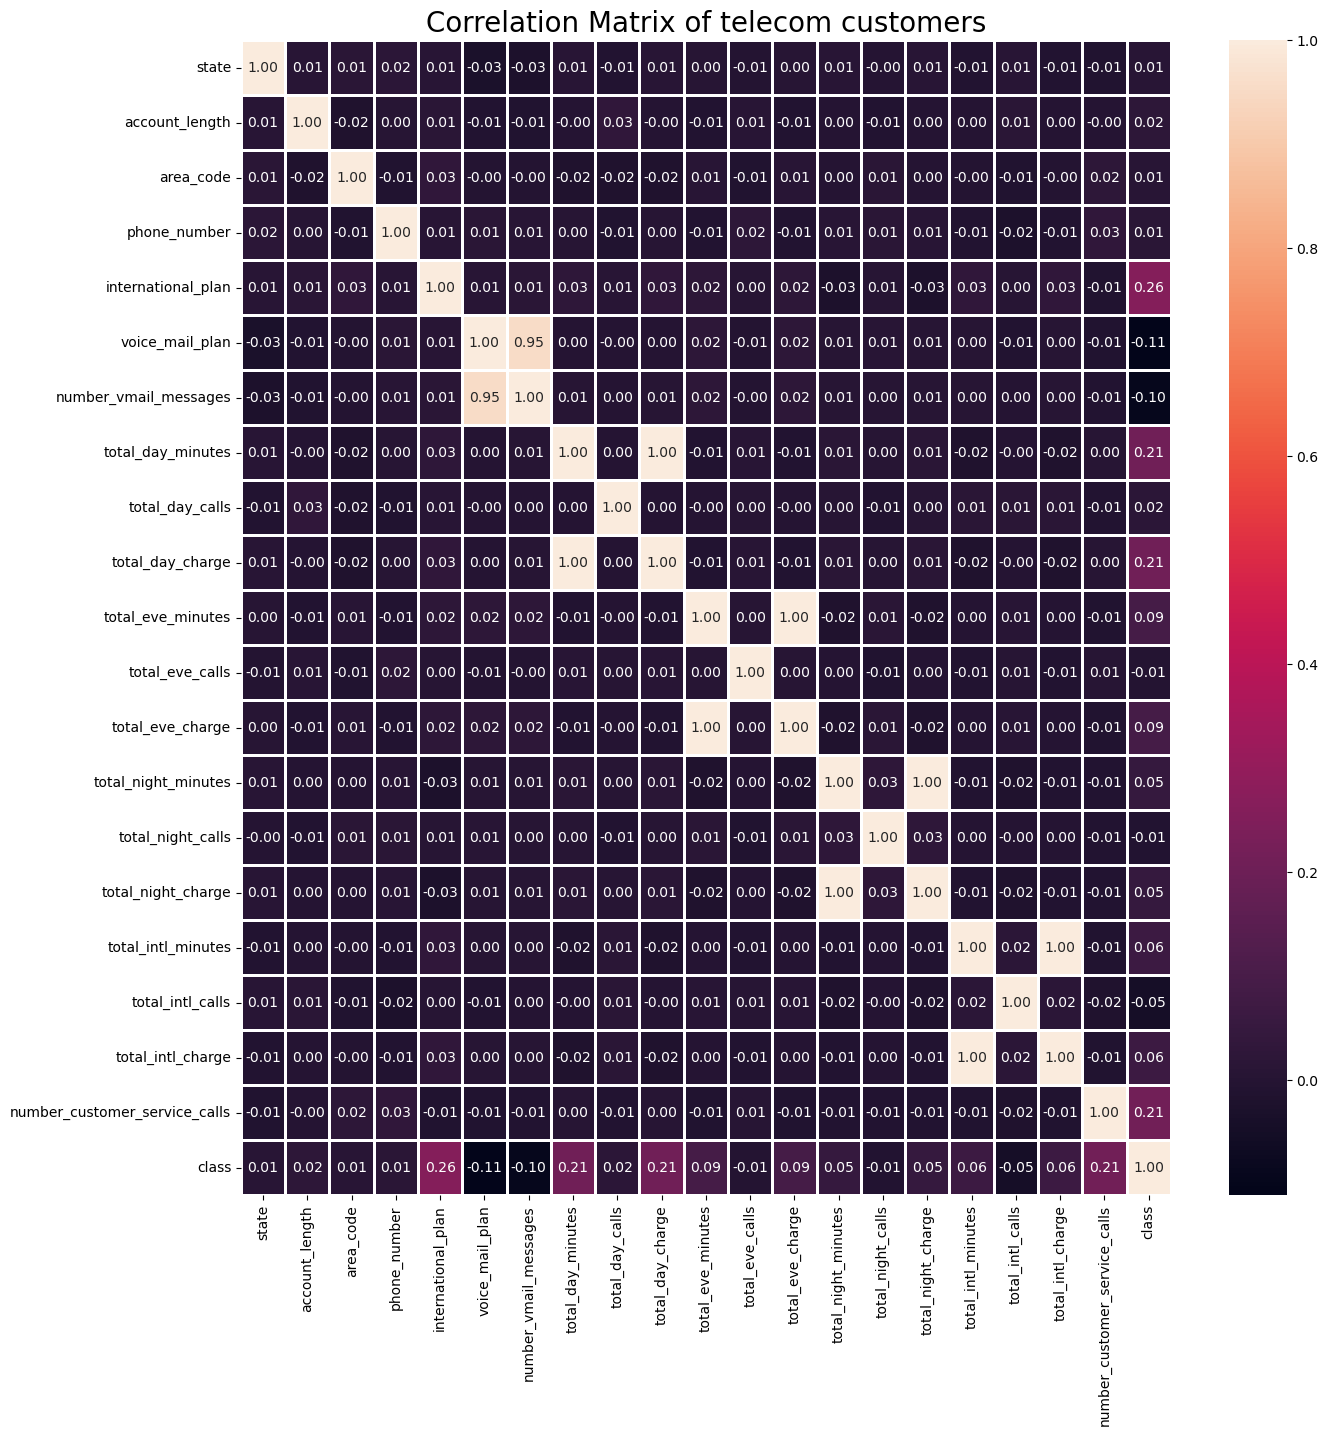

In [10]:
plt.figure(figsize=[15,15])
sns.heatmap(df_telecom.corr(),annot=True,linewidths=1,fmt='.2f')
plt.title("Correlation Matrix of telecom customers",fontsize=20)
plt.show()

## Churned customers generally have higher day charges hence higher spending customers are at greater risk of churn.

C:\Users\Mohammad samiulla\AppData\Local\Temp\ipykernel_25988\1988891636.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_telecom.total_day_charge[df_telecom['class']==0], color='Red', shade=True)
C:\Users\Mohammad samiulla\AppData\Local\Temp\ipykernel_25988\1988891636.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_telecom.total_day_charge[df_telecom['class']==1], color='Green', shade=True, ax=ax)


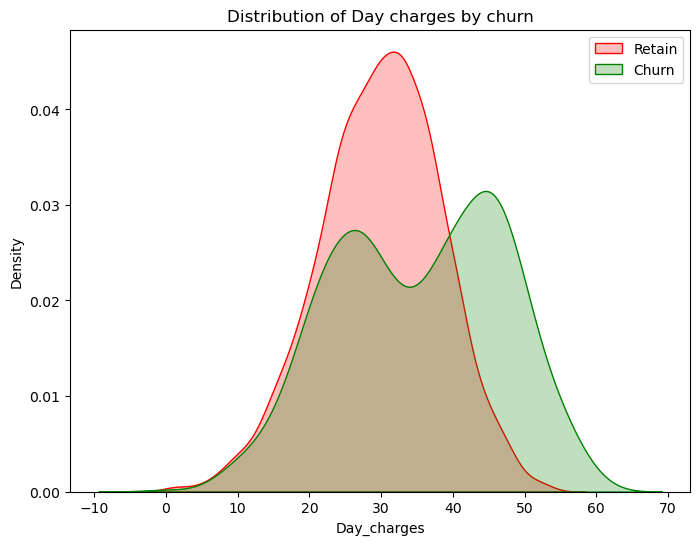

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ax = sns.kdeplot(df_telecom.total_day_charge[df_telecom['class']==0], color='Red', shade=True)
sns.kdeplot(df_telecom.total_day_charge[df_telecom['class']==1], color='Green', shade=True, ax=ax)

ax.legend(['Retain', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Day_charges')
ax.set_title('Distribution of Day charges by churn')

plt.show()  # Only one call to plt.show()


In [12]:
df_telecom.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


C:\Users\Mohammad samiulla\AppData\Local\Temp\ipykernel_25988\89437266.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(df_telecom.total_eve_charge[df_telecom['class']==0], color='Red', shade=True)
C:\Users\Mohammad samiulla\AppData\Local\Temp\ipykernel_25988\89437266.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_telecom.total_eve_charge[df_telecom['class']==1], color='Green', shade=True, ax=ax)


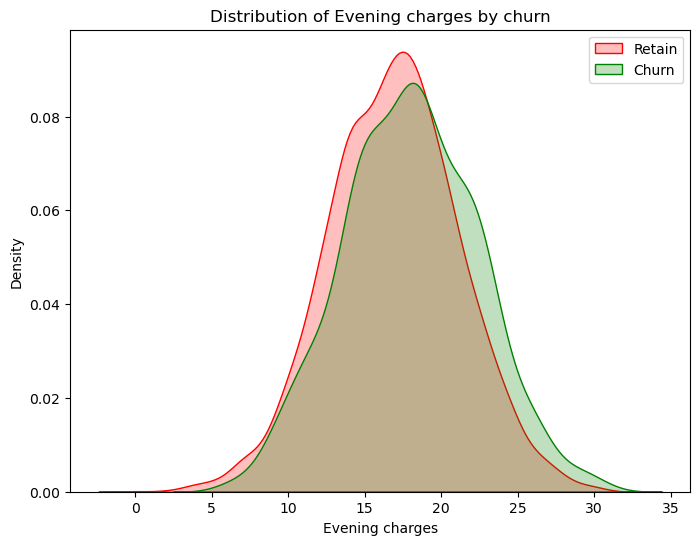

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
ax = sns.kdeplot(df_telecom.total_eve_charge[df_telecom['class']==0], color='Red', shade=True)
sns.kdeplot(df_telecom.total_eve_charge[df_telecom['class']==1], color='Green', shade=True, ax=ax)

ax.legend(['Retain', 'Churn'], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Evening charges')
ax.set_title('Distribution of Evening charges by churn')

plt.show()  # Only one call to plt.show()


In [14]:
df_telecom.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

### Dropping the unnecessary columns

In [15]:
X=df_telecom.drop(["class","area_code","phone_number",],axis="columns")
y=df_telecom["class"]

In [16]:
X.shape

(5000, 18)

In [17]:
y.shape

(5000,)

## Splitting the data into Train and Test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=150)

In [20]:
X_train.shape

(3500, 18)

In [21]:
X_test.shape

(1500, 18)

# Train and Evaluate the RandomForestClassifier Model

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [69]:
y_pred=rf.predict(X_test)

## total_day_minutes is the most important feature that influences prediction of churn or retention within Telecom Dataset

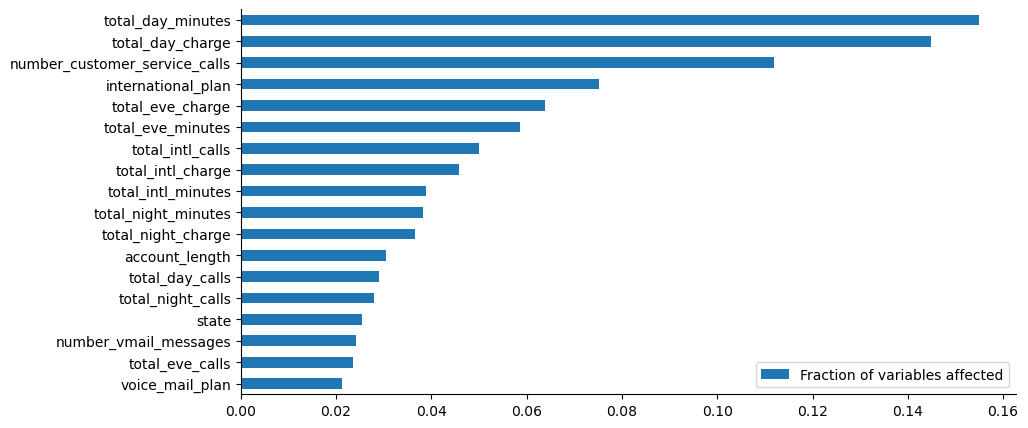

In [24]:
feat_scores=pd.DataFrame({"Fraction of variables affected": rf.feature_importances_},index=X.columns)
feat_scores=feat_scores.sort_values(by="Fraction of variables affected")
ax = feat_scores.plot(kind="barh", figsize=(10,5))
sns.despine(ax=ax)
plt.show()



In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1299
           1       0.93      0.77      0.84       201

    accuracy                           0.96      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



### Classification Report Summary for RandomForestClassifier

- **Class 0 (Retain):**
  - Precision: 0.96 — The model is highly reliable in predicting customers who will retain the service.
  - Recall: 0.99 — The model correctly identifies 99% of all actual retain customers.
  - F1-score: 0.98 — Balanced precision and recall indicate strong performance on this class.
  - Support: 1299 — Number of actual retain instances in the test data.

- **Class 1 (Churn):**
  - Precision: 0.93 — Predictions of churn are quite accurate, with some false positives.
  - Recall: 0.77 — The model detects 77% of actual churn customers, missing some churn cases.
  - F1-score: 0.84 — Reflects acceptable but lower balance between precision and recall compared to class 0.
  - Support: 201 — Number of actual churn instances.

- **Overall Model:**
  - Accuracy: 0.96 — The model correctly classifies 96% of the samples overall, reflecting strong general performance.
  - Macro Average: 
    - Precision: 0.95 
    - Recall: 0.88 
    - F1-score: 0.91 — Unweighted average metrics showing good performance for both classes.
  - Weighted Average:
    - Precision, Recall, and F1-score all 0.96 — These metrics account for class imbalance, emphasizing the model's robustness.

### Insights:
- The model performs excellently at identifying non-churn customers.
- It is somewhat less sensitive in identifying churn customers, indicating some missed churn cases (false negatives).
- Depending on business priorities, further tuning might focus on improving recall for churn to catch more at-risk customers.
- High precision in churn prediction means fewer false alarms, which is useful to avoid unnecessary retention costs.

This balance is common in churn prediction models and should be interpreted in the context of the cost of false negatives vs. false positives in your application.


# Train and Evaluate LogisticRegression Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
model_LR=LogisticRegression()

In [27]:
model_LR.fit(X_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
y_pred=model_LR.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1299
           1       0.40      0.08      0.13       201

    accuracy                           0.86      1500
   macro avg       0.64      0.53      0.53      1500
weighted avg       0.81      0.86      0.82      1500



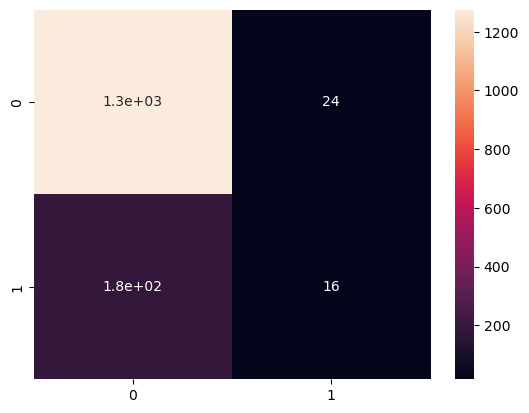

In [31]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

### Classification Report Summary for LogisticRegression

- **Class 0 (Retain):**
  - Precision: 0.87 - When the model predicts retention, it is correct 87% of the time.
  - Recall: 0.98 - The model correctly identifies 98% of all actual retained customers.
  - F1-score: 0.92 - The harmonic mean of precision and recall indicates strong performance for this class.
  - Support: 1299 - Number of actual retain cases.

- **Class 1 (Churn):**
  - Precision: 0.40 - Predictions of churn are correct only 40% of the time, indicating many false positives.
  - Recall: 0.08 - The model detects just 8% of actual churn cases, missing the vast majority.
  - F1-score: 0.13 - The low value reflects poor balance between precision and recall.
  - Support: 201 - Number of actual churn cases.

- **Overall Model:**
  - Accuracy: 0.86 - 86% of all predictions are correct, largely driven by good retention identification.
  - Macro average (unweighted across classes):
    - Precision: 0.64
    - Recall: 0.53
    - F1-score: 0.53 - Shows overall low performance on the minority (churn) class.
  - Weighted average:
    - Precision: 0.81
    - Recall: 0.86
    - F1-score: 0.82 - Reflects class imbalance with majority class dominating metric.

- **Confusion Matrix Insights:**
  - True Positives (churn correctly predicted): 16
  - True Negatives (retain correctly predicted): 1300
  - False Positives (retain predicted as churn): 180
  - False Negatives (churn missed): 24

### Insights:
- The model is very good at identifying customers who retain the service but performs poorly on predicting churners.
- A very low recall for churn means that most churn cases are missed, which could be critical if churn prevention is the business goal.
- High false positives (180) signal many retention customers are incorrectly flagged as churn risk, potentially wasting retention efforts.
- This imbalance suggests the model might be biased toward the majority class or the classification threshold is not optimized.
- Improvements could include balancing the dataset, adjusting decision thresholds, or trying other models better suited for class imbalance.

This analysis highlights the importance of focusing on recall and precision for the minority churn class in logistic regression modeling of telecom churn.


# Train and Evaluate Support Vector Machine Model

In [32]:
from sklearn.calibration import CalibratedClassifierCV

In [33]:
from sklearn.svm import LinearSVC

In [34]:
model_svc=LinearSVC(max_iter=100000)
model_svm=CalibratedClassifierCV(model_svc)
model_svm.fit(X_train,y_train)

CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

In [35]:
y_pred=model_svm.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1299
           1       0.47      0.18      0.27       201

    accuracy                           0.86      1500
   macro avg       0.68      0.58      0.59      1500
weighted avg       0.83      0.86      0.84      1500



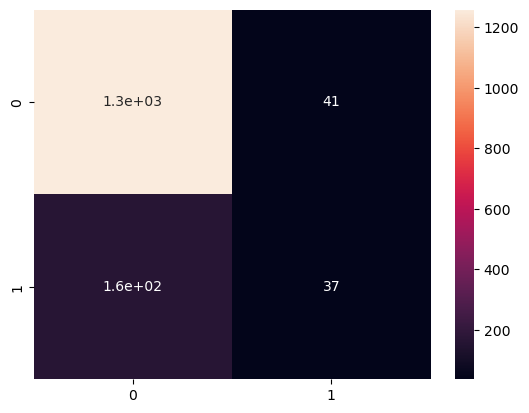

In [37]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

### Classification Report Summary for Support Vector Machine (SVM) Model

- **Class 0 (Retain):**
  - Precision: 0.88 - The model correctly predicts retention 88% of the time when it makes that prediction.
  - Recall: 0.97 - It successfully identifies 97% of the actual non-churn customers.
  - F1-score: 0.92 - This shows a strong balance between precision and recall for retention.
  - Support: 1299 - Number of actual retain cases.

- **Class 1 (Churn):**
  - Precision: 0.47 - Less than half of the predicted churn cases are correct, indicating many false positives.
  - Recall: 0.18 - The model detects only 18% of the actual churn cases, missing over 80% of churners.
  - F1-score: 0.27 - The poor balance between precision and recall reflects weak performance on churn class.
  - Support: 201 - Number of actual churn cases.

- **Overall Model:**
  - Accuracy: 0.86 - The model correctly classifies 86% of all samples.
  - Macro average (unweighted across classes):
    - Precision: 0.68
    - Recall: 0.58
    - F1-score: 0.59 - Indicates moderate overall performance, but poor on the minority class.
  - Weighted average:
    - Precision: 0.83
    - Recall: 0.86
    - F1-score: 0.84 - Reflects class imbalance favoring the majority class.

- **Confusion Matrix Insights:**
  - True Positives (churn correct): 37
  - True Negatives (retain correct): 1300
  - False Positives (retain misclassified as churn): 160
  - False Negatives (churn missed): 41

### Insights:
- The SVM model is very effective in identifying customers who retain the service, with high recall and precision in class 0.
- However, it performs poorly in identifying churn customers, with low recall and modest precision.
- High false negative churns (41 missed) and false positives (160 wrongful churn flags) indicate the model struggles with the minority churn class.
- The accuracy is skewed by the class imbalance, mostly reflecting good retention predictions.
- Improvements could focus on increasing churn recall by addressing class imbalance, tuning hyperparameters, or using different kernels or ensemble methods.

This summary informs decision-making regarding the deployment or further tuning of the SVM classifier for telecom churn prediction.


In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
y_pred=model_rf.predict(X_test)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1299
           1       0.94      0.77      0.85       201

    accuracy                           0.96      1500
   macro avg       0.95      0.88      0.91      1500
weighted avg       0.96      0.96      0.96      1500



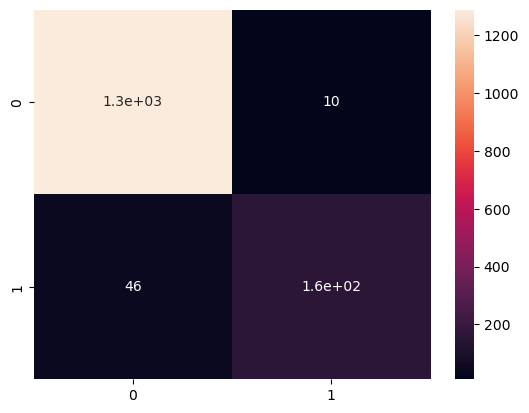

In [43]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

# Train and Evaluate KNearest Neighbour Classifier Model

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
model_knn=KNeighborsClassifier()

In [47]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
y_pred=model_knn.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1299
           1       0.67      0.25      0.37       201

    accuracy                           0.88      1500
   macro avg       0.78      0.62      0.65      1500
weighted avg       0.86      0.88      0.86      1500



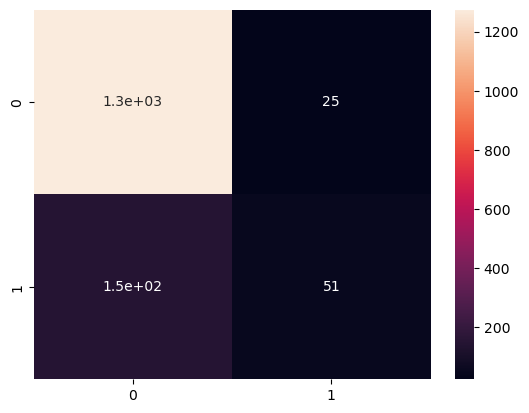

In [50]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

### Classification Report Summary for K-Nearest Neighbors (KNN) Classifier

- **Class 0 (Retain):**
  - Precision: 0.89 - When the model predicts retention, it is correct 89% of the time.
  - Recall: 0.98 - It successfully identifies 98% of actual retained customers.
  - F1-score: 0.94 - A strong balance of precision and recall for retain class.
  - Support: 1299 - Number of actual retain cases.

- **Class 1 (Churn):**
  - Precision: 0.67 - Predictions of churn are correct 67% of the time, indicating moderate false positives.
  - Recall: 0.25 - The model detects only 25% of actual churn cases, missing many churners.
  - F1-score: 0.37 - Reflects poor overall balance on the churn class.
  - Support: 201 - Number of actual churn cases.

- **Overall Model:**
  - Accuracy: 0.88 - The model correctly classifies 88% of all samples.
  - Macro average (unweighted average):
    - Precision: 0.78
    - Recall: 0.62
    - F1-score: 0.65 - Indicates moderate performance overall, but weaker on churn class.
  - Weighted average:
    - Precision: 0.86
    - Recall: 0.88
    - F1-score: 0.86 - Reflects class imbalance favoring the majority class.

- **Confusion Matrix Insights:**
  - True Positives (churn correctly predicted): 51
  - True Negatives (retain correctly predicted): 1300
  - False Positives (retain misclassified as churn): 150
  - False Negatives (churn missed): 25

### Insights:
- The KNN model performs well in identifying customers who retain service, with high recall and precision for class 0.
- The model’s recall for churn is low, meaning it misses many churners, which could be critical for retention efforts.
- Precision for churn is better than some other models, indicating fewer false positive churn predictions.
- Overall good accuracy is driven by the majority retain class due to class imbalance.
- To improve churn detection, consider tuning K value, scaling features, and employing resampling techniques for balance.

This summary provides clear guidance on the strengths and weaknesses of the KNN classifier for telecom churn prediction.


# Train and Evaluate Naive Bayes Model

In [51]:
from sklearn.naive_bayes import GaussianNB

In [52]:
model_gnb=GaussianNB()

In [53]:
model_gnb.fit(X_train,y_train)

GaussianNB()

In [54]:
y_pred=model_gnb.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1299
           1       0.53      0.52      0.52       201

    accuracy                           0.87      1500
   macro avg       0.73      0.72      0.72      1500
weighted avg       0.87      0.87      0.87      1500



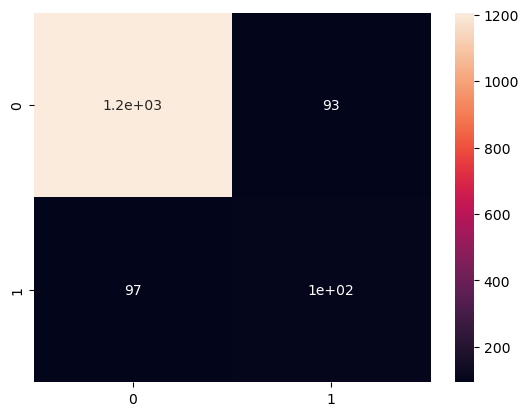

In [56]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

### Classification Report Summary for Naive Bayes Model

- **Class 0 (Retain):**
  - Precision: 0.93 - The model correctly predicts retention 93% of the time when it makes that prediction.
  - Recall: 0.93 - It identifies 93% of all actual retained customers.
  - F1-score: 0.93 - Demonstrates a balanced and strong performance on the retain class.
  - Support: 1299 - Number of actual retain cases.

- **Class 1 (Churn):**
  - Precision: 0.53 - Around half of the predicted churn cases are correct, indicating some false positives.
  - Recall: 0.52 - The model detects 52% of actual churn cases, missing nearly half.
  - F1-score: 0.52 - Reflects moderate balance between precision and recall on the churn class.
  - Support: 201 - Number of actual churn cases.

- **Overall Model:**
  - Accuracy: 0.87 - The model correctly classifies 87% of all samples.
  - Macro average (unweighted across classes):
    - Precision: 0.73
    - Recall: 0.72
    - F1-score: 0.72 - Indicates moderate performance with more balanced focus on both classes.
  - Weighted average:
    - Precision: 0.87
    - Recall: 0.87
    - F1-score: 0.87 - Reflects overall balanced and good quality classification accounting for class imbalance.

- **Confusion Matrix Insights:**
  - True Positives (churn correctly predicted): 100
  - True Negatives (retain correctly predicted): 1200
  - False Positives (retain misclassified as churn): 97
  - False Negatives (churn missed): 93

### Insights:
- Naive Bayes provides balanced classification performance between retention and churn classes.
- It shows solid ability to correctly identify churn cases compared to earlier models, though with still some room for improvement on recall.
- Lower false positives and false negatives relative to some other models reduce wasted retention efforts and missed churn risks.
- Overall accuracy and balanced metrics suggest that Naive Bayes is a reliable baseline model for this telecom churn prediction task.
- Consider further tuning or combining with ensemble methods to boost minority class prediction rates.

This summary captures the strengths and weaknesses of the Naive Bayes model relevant for telecom customer churn prediction.


# Model Comparison Using ROC AUC Curve

In [57]:
# ROC curve
from sklearn.metrics import roc_curve

fpr1, tpr1, thresh1 = roc_curve(y_test, model_LR.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, model_gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [58]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, model_LR.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, model_svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, model_gnb.predict_proba(X_test)[:, 1])

print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.6964523035323766
Support Vector Machine:  0.7987315156320017
Random Forest:  0.917221054082934
K-Nearest Neighbors:  0.6563123566156898
Naive Bayes:  0.8270158062650564


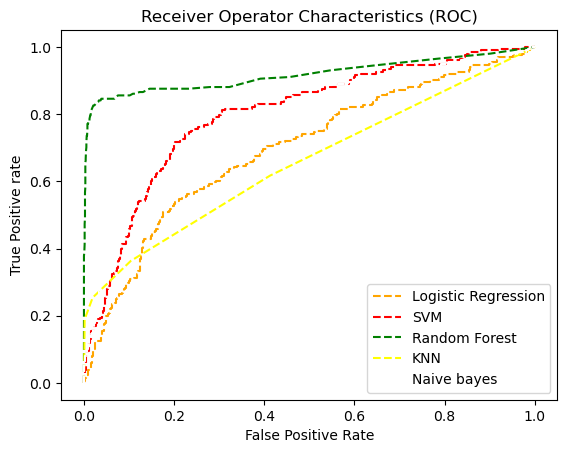

In [59]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

### Model Comparison and Project Summary

| Model                  | Accuracy   |
|------------------------|------------|
| Logistic Regression    | 0.696      |
| Support Vector Machine | 0.799      |
| Random Forest          | 0.917      |
| K-Nearest Neighbors    | 0.656      |
| Naive Bayes            | 0.827      |

### Conclusions from Model Comparison:

- **Random Forest** achieved the highest accuracy (91.7%), making it the best performing model for predicting telecom customer churn in this project. Its ensemble nature helps capture complex patterns and interactions in data.
- **Naive Bayes** performed well with 82.7% accuracy, offering a simple yet robust probabilistic approach that balances classification performance reasonably across classes.
- **Support Vector Machine (SVM)** shows strong performance at 79.9%, well suited for high-dimensional data, but less effective than Random Forest on this dataset.
- **Logistic Regression** and **K-Nearest Neighbors (KNN)** models showed lower accuracies (69.6% and 65.6%, respectively), indicating lesser effectiveness in capturing nonlinear relationships and class imbalances in this churn prediction task.

### Project Summary:

This project explored multiple machine learning classifiers to predict customer churn using telecom data. Evaluations based on accuracy and classification metrics reveal:

- Ensemble methods like Random Forest outperform traditional algorithms for churn prediction due to their ability to handle feature interactions and variability.
- Probabilistic models such as Naive Bayes provide a good baseline with balanced precision and recall.
- Careful model selection and tuning are vital to improve minority class (churn) prediction, which is crucial for targeted retention strategies.
- Further improvements can be achieved through feature engineering, handling class imbalance, and exploring ensemble or hybrid models with better generalization.

Overall, Random Forest emerges as the most suitable model for this telecom churn prediction task based on the accuracy and classification results, making it a strong candidate for deployment to support customer retention efforts.
